# McKinney Chapter 5 - Practice for Section 03

## Announcements

1. No DataCamp this week, but I suggest you keep working on it
2. Keep forming groups, and I will post our first project early next week

## 10-Minute Recap

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
%precision 4
pd.options.display.float_format = '{:.4f}'.format
%config InlineBackend.figure_format = 'retina'

pandas provides two *very useful* data structures:

1. Data frames are like a worksheet in an Excel workbook (2-D, mixed data type)
2. Series are like a column in a worksheet in an Excel workbook (1-D, one data type)

In [3]:
np.random.seed(42)
df = pd.DataFrame(
    data=np.random.randn(4, 4),
    index=list('ABCD'),
    columns=list('abcd')
)

df

,a,b,c,d
A,0.4967,-0.1383,0.6477,1.5230
B,-0.2342,-0.2341,1.5792,0.7674
C,-0.4695,0.5426,-0.4634,-0.4657
D,0.2420,-1.9133,-1.7249,-0.5623


How can we slice the first two rows and three columns?
We can slice data frames two ways:

1. Using integer locations and the `.iloc[]` method
2. Using row and column names with the `.loc[]` method

In [4]:
df.iloc[:2, :3] # slice with j,k notation, like NumPy

,a,b,c
A,0.4967,-0.1383,0.6477
B,-0.2342,-0.2341,1.5792


***When we slice by names or labels, we get both left and right edges included!***

In [5]:
df.loc['A':'B', 'a':'c']

,a,b,c
A,0.4967,-0.1383,0.6477
B,-0.2342,-0.2341,1.5792


We can easily add columns!

In [6]:
df['e'] = 5 # broadcasts to every row in df

df

,a,b,c,d,e
A,0.4967,-0.1383,0.6477,1.5230,5
B,-0.2342,-0.2341,1.5792,0.7674,5
C,-0.4695,0.5426,-0.4634,-0.4657,5
D,0.2420,-1.9133,-1.7249,-0.5623,5


In [7]:
df['e'] = np.random.randn(4)

df

,a,b,c,d,e
A,0.4967,-0.1383,0.6477,1.5230,-1.0128
B,-0.2342,-0.2341,1.5792,0.7674,0.3142
C,-0.4695,0.5426,-0.4634,-0.4657,-0.9080
D,0.2420,-1.9133,-1.7249,-0.5623,-1.4123


A series is the other, 1-D data structure in pandas!

In [8]:
ser = pd.Series(data=np.arange(2.), index=['C', 'D']) # the . in np.arange() makes the array floats

ser

C   0.0000
D   1.0000
dtype: float64

In [9]:
df['f'] = ser

df

,a,b,c,d,e,f
A,0.4967,-0.1383,0.6477,1.5230,-1.0128,NaN
B,-0.2342,-0.2341,1.5792,0.7674,0.3142,NaN
C,-0.4695,0.5426,-0.4634,-0.4657,-0.9080,0.0000
D,0.2420,-1.9133,-1.7249,-0.5623,-1.4123,1.0000


## Practice

In [10]:
tickers = 'AAPL IBM MSFT GOOG'
prices = yf.download(tickers=tickers)

[*********************100%%**********************]  4 of 4 completed


In [11]:
returns = (
    prices['Adj Close'] # slice adj close column
    .iloc[:-1] # drop last row with intra day prices, which are sometimes missing
    .pct_change() # calculate returns
    .dropna() # drop leading rows with at least one missing value
)

returns

,AAPL,GOOG,IBM,MSFT
Date,,,,
2004-08-20,0.0029,0.0794,0.0042,0.0029
2004-08-23,0.0091,0.0101,-0.0070,0.0044
2004-08-24,0.0280,-0.0414,0.0007,0.0000
2004-08-25,0.0344,0.0108,0.0043,0.0114
2004-08-26,0.0487,0.0180,-0.0045,-0.0040
...,...,...,...,...
2024-01-23,0.0067,0.0066,0.0064,0.0060
2024-01-24,-0.0035,0.0112,-0.0001,0.0092
2024-01-25,-0.0017,0.0219,0.0949,0.0057


### What are the mean daily returns for these four stocks?

In [12]:
returns.mean() # default axis=0 takes the mean of each column

AAPL   0.0014
GOOG   0.0010
IBM    0.0004
MSFT   0.0008
dtype: float64

If we pass `axis=1`, we get the mean return on each day.
We can this an "equally-weighted portfolio return."
$$r_{p,t} = \sum_{i=0}^4 \frac{1}{4} r_{i, t}$$

In [13]:
returns.mean(axis=1)

Date
2004-08-20    0.0224
2004-08-23    0.0041
2004-08-24   -0.0032
2004-08-25    0.0152
2004-08-26    0.0146
               ...  
2024-01-23    0.0064
2024-01-24    0.0042
2024-01-25    0.0302
2024-01-26   -0.0065
2024-01-29    0.0040
Length: 4893, dtype: float64

### What are the standard deviations of daily returns for these four stocks?

pandas calcualates sample statistics by default.

In [14]:
returns.std()

AAPL   0.0206
GOOG   0.0193
IBM    0.0143
MSFT   0.0171
dtype: float64

### What are the *annualized* means and standard deviations of daily returns for these four stocks?

We annualize mean returns by multiplying by $T$ ($T=252$ for daily returns, $T=12$ for month returns, and so on).
We annualize standard deviations by multiplying by $\sqrt(T)$.

In [15]:
returns.mean().mul(252)

AAPL   0.3640
GOOG   0.2594
IBM    0.0981
MSFT   0.2010
dtype: float64

In [16]:
returns.std().mul(np.sqrt(252))

AAPL   0.3276
GOOG   0.3070
IBM    0.2271
MSFT   0.2722
dtype: float64

### Plot *annualized* means versus standard deviations of daily returns for these four stocks

Use `plt.scatter()`, which expects arguments as `x` (standard deviations) then `y` (means).

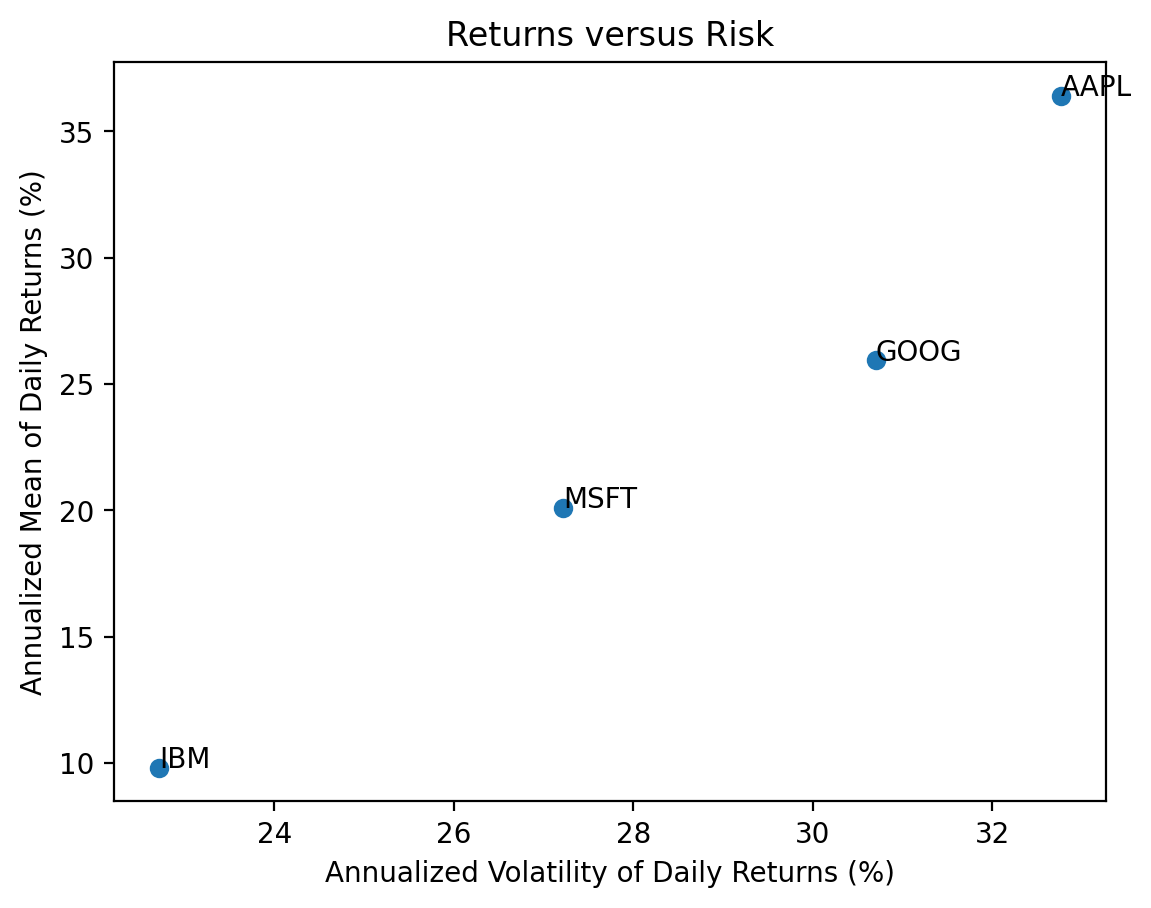

In [17]:
vols = returns.std().mul(np.sqrt(252) * 100)
means = returns.mean().mul(252 * 100)

plt.scatter(
    x=vols,
    y=means
)

# add tickers to each point
for i in means.index: # loop over ticker index
    plt.text( # plots string s at coordinates x and y
        x=vols[i], # indexes volatility
        y=means[i], # indexes mean return
        s=i # ticker index
    )

plt.xlabel('Annualized Volatility of Daily Returns (%)')
plt.ylabel('Annualized Mean of Daily Returns (%)')

plt.title('Returns versus Risk')
plt.show()

### Repeat the previous calculations and plot for the stocks in the Dow-Jones Industrial Index (DJIA)

We can find the current DJIA stocks on [Wikipedia](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average).
We will need to download new data, into `tickers2`, `prices2`, and `returns2`.

### Calculate total returns for the stocks in the DJIA

We can use the `.prod()` method to compound returns as $1 + R_T = \prod_{t=1}^T (1 + R_t)$.
Technically, we should write $R_T$ as $R_{0,T}$, but we typically omit the subscript $0$.

### Plot the distribution of total returns for the stocks in the DJIA

We can plot a histogram, using either the `plt.hist()` function or the `.plot(kind='hist')` method.

### Which stocks have the minimum and maximum total returns?

### Plot the cumulative returns for the stocks in the DJIA

We can use the cumulative product method `.cumprod()` to calculate the right hand side of the formula above.

### Repeat the plot above with only the minimum and maximum total returns